In [1]:
#### Libraries that we are going to use

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
import pandas as pd
import numpy as np
from math import pi
import requests
from time import time
from datetime import datetime, timedelta
#import random
import matplotlib.patches as mpatches
#from IPython.display import HTML
from IPython.display import Image
import seaborn as sns
%matplotlib inline


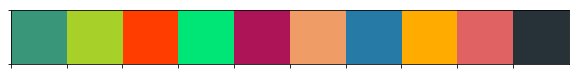

In [2]:
#### I create a palette of colors to use in graphics

palette = ["#3a9679", "#a7d129","#ff3d00", "#00e676", "#ad1457", "#f09c67", "#257aa6", 
           "#ffab00", "#e16262", "#263238"]

sns.palplot(sns.color_palette(palette))


In [3]:
#### Read the file

players = pd.read_csv('data.csv')

In [4]:
#### These data have a strange format so we clean them

players[['Value', 'Wage']].head(1)

Value   Wage
0  €110.5M  €565K

In [5]:
####  use this function to clean the values and salaries since they are in M and K

def clear(x):
    try:
        if 'M' in x:
            return float(x.split("M")[0][1:])
        elif 'K' in x:
            return float(x.split("K")[0][1:])/1000
    except:
        return 0

players['Value'] = players['Value'].apply(lambda x : clear(x))
players['Wage'] = players['Wage'].apply(lambda x : clear(x))

players[['Value', 'Wage']].head(1)

Value   Wage
0  110.5  0.565

In [6]:
# 'Unnamed: 0' : 'Indice', 

In [7]:
#### Some column names are separated so let's put them together

players.rename(columns={'Club Logo':'Club_Logo', 
                        'Preferred Foot' : 'Preferred_Foot', 'Body Type' : 'Body_Type',
                        'Jersey Number' : 'Jersey_Number', 'Loaned From' : 'Loaned_From', 
                        'Contract Valid Until' : 'Contract_Valid',
                        'Release Clause' : 'Release_Clause'}, inplace=True)

In [8]:
#### We eliminate the rows with empty data in the fields that we will use later and fill in the 
#### least important ones with No Data and 0 depending on the type of data that they are

players = players.dropna(subset=['Club', 'Position', 'Value', 'Wage'])
players[['Release_Clause','Loaned_From','Joined']] = players[['Release_Clause',
                                                              'Loaned_From',
                                                              'Joined']].fillna('No data')
players = players.fillna(0)
players = players.reset_index()

In [9]:
#### we check for null data

players.isnull().sum().sum()

0

In [10]:
#### Another data that is wrong is the type of body, in a few cases the information is missing 
#### and completed with the name or other data, we will create a function to solve this

players.Body_Type.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [11]:
def body_type_func(players):
    if players in('Messi', 'C. Ronaldo', 'Neymar', 'Courtois', 'PLAYER_BODY_TYPE_25', 
                  'Shaqiri', 'Akinfenwa'):
        return 'Normal'
    else:
        return players

In [12]:
#### With these functions I will create new data, the data selection is based on the grouped 
#### statistics that shows the fifa

def defending(players):
    return int(round((players[['Interceptions','Marking', 'StandingTackle', 
                               'SlidingTackle', 'HeadingAccuracy']].mean()).mean()))

def passing(players):
    return int(round((players[['Vision', 'Crossing', 'ShortPassing',
                               'LongPassing','FKAccuracy','Curve']].mean()).mean()))

def dribbling(players):
    return int(round((players[['Agility', 'Balance', 'Reactions', 
                               'BallControl', 'Dribbling']].mean()).mean()))

def shooting(players):
    return int(round((players[['Positioning', 'Finishing', 'ShotPower', 
                               'LongShots', 'Volleys', 'Penalties']].mean()).mean()))

def pace(players):
    return int(round((players[['Acceleration', 'SprintSpeed']].mean()).mean()))

def physical(players):
    return int(round((players[['Jumping', 'Stamina', 'Strength', 'Aggression', 
                               'Composure']].mean()).mean()))

#### This function is different, here I create a fact that is not in any statesman. 
#### I take 50 points to the player's favorite foot and then I add the total of stars to 
#### 10 that he has on his bad foot, so a player who has the right foot preferred and has 
#### a star on his bad foot has 60 ambidextrous points (50 +10) and one that has 5 stars 
#### has 100 (50 + 50) in this way I can get what is the player's ambidextrous percentage.
#### If I have two players with the same statistics with this one I can differentiate them 
#### because if they are the same I can choose with the one that best hit them with both feet.

def ambidextrous_func(players):
    return (int(players) * 10) + 50

In [13]:
#### Start a counter to see how long it took to execute all functions

timeFinish = 0
start_time = time()

In [14]:
players['Defending'] = players.apply(defending, axis=1)

In [15]:
players['Passing'] = players.apply(passing, axis=1)

In [16]:
players['Dribbling'] = players.apply(dribbling, axis=1)

In [17]:
players['Shooting'] = players.apply(shooting, axis=1)

In [18]:
players['Pace'] = players.apply(pace, axis=1)

In [19]:
players['Physical'] = players.apply(physical, axis=1)

In [20]:
players['Ambidextrous'] = players['Weak Foot'].apply(ambidextrous_func)

In [21]:
players['Body_Type'] = players['Body_Type'].apply(body_type_func)

In [22]:
timeFinish += (time() - start_time)
print('Ending - time: ' + str(timedelta(seconds=timeFinish)))

Ending - time: 0:03:13.984000


In [23]:
len(players.columns)

96

In [24]:
#### The dataset has 96 columns, let's put together another one with the ones that are going 
#### to be used

data = players[['ID','Name','Defending','Passing','Dribbling','Shooting',
                'Pace','Physical','Ambidextrous','GKDiving', 
                'GKHandling', 'GKKicking', 'GKReflexes','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club', 'Position', 
                'Value', 'Wage','Preferred_Foot','Body_Type','Jersey_Number',
                'Joined','Loaned_From','Height','Weight','Contract_Valid', 
                'Overall','Potential']]

In [25]:
data.head(1)

ID      Name  Defending  Passing  Dribbling  Shooting  Pace  Physical  \
0  158023  L. Messi         36       90         95        88    88        69   

   Ambidextrous  GKDiving    ...     Preferred_Foot  Body_Type  Jersey_Number  \
0            90       6.0    ...               Left     Normal           10.0   

        Joined  Loaned_From Height  Weight Contract_Valid Overall Potential  
0  Jul 1, 2004      No data    5'7  159lbs           2021      94        94  

[1 rows x 32 columns]

In [26]:
#### This function will dynamically graph the statistics of each player similiarly than in 
#### the video game

def graph_function(row):
    
    flag_image = "example/img_flag.jpg"
    player_image = "example/img_player.jpg"
    logo_image = "example/img_club_logo.jpg"
    fondo_grafico = mpimg.imread('example/fondo.jpg')
    face_photo = data.Photo[row]

    ###############################################################################################

    #### In this instance I get the photo of the player's face. I could verify that there were many 
    #### players who did not have the photo or the link was down, so look on the page of fifa the 
    #### image that was used when this happened. Through the request I can connect to the URL and get
    #### the status, if it gives 200 is that the photo was obtained well, if it gives 404 is that 
    #### there was no connection, so if the request returns 404 I just change the url by the 
    #### silhouette , thus avoiding errors.

    ###############################################################################################

    not_found = 'https://cdn.sofifa.org/players/4/notfound_0.png'
    r = requests.get(face_photo)
    
    if r.status_code == 404:
        face_photo = not_found
        
    player_img = requests.get(face_photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
        
    #### Using this code outside of this function will be able to see that the query is made to 
    #### two URLs, one returns success and another 404
    ####
    ####    for x in range(17003, 17005):
    ####        r = requests.get(data.Photo[x])
    ####        if r.status_code == 404:
    ####            print('Code Error 404 : ' + data.Name[x] + ' - ' + data.Photo[x])
    ####        else:
    ####            print('Code Success 200: ' + data.Name[x] + ' - ' + data.Photo[x])
    ####        
    ####    Code Error 404 : J. Quiñones Saya - https://cdn.sofifa.org/players/4/19/243466.png
    ####    Code Success 200: K. Brouder - https://cdn.sofifa.org/players/4/19/228108.png   

    ###############################################################################################
        
    img_flag = requests.get(data.Flag[row]).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)

     
    logo_img = requests.get(data.Club_Logo[row]).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)

    basic_color = '#37474f'
    color_annotate = '#01579b'

    plt.figure(figsize=(15,8))
    categories=list(data)[1:]

    ###############################################################################################

    #### Thanks to this condition, I can differentiate the statistics with which the graph will 
    #### be set depending on whether the player is GK or not.
    #### In valuesUseGraph you can see that I repeat the first and last statistics, this is 
    #### because the polar graph will assemble the angles in which the circle will be divided so 
    #### I start at 0 and have to finish at that point. If I do not repeat that statistic at the end 
    #### the function will return an error that it needs a number x of parameters but that it is 
    #### receiving 1 less

    if data.Position[row] != 'GK':
        categories_graph = ['Defending','Passing','Dribbling','Shooting','Pace','Physical',
                            'Ambidextrous']
        categories_drop = ['ID', 'Name','GKDiving','GKHandling', 'GKKicking', 'GKReflexes', 'Name']
        valuesUseGraph = [data.Defending[row], data.Passing[row], data.Dribbling[row], 
                        data.Shooting[row], data.Pace[row],
                        data.Physical[row], data.Ambidextrous[row], data.Defending[row]]    
    else:
        categories_graph = ['GKDiving','GKHandling', 'GKKicking', 'GKReflexes', 'Ambidextrous']
        categories_drop = ['ID', 'Name','Defending','Passing','Dribbling','Shooting','Pace',
                           'Physical']
        valuesUseGraph = [data.GKDiving[row], data.GKHandling[row], data.GKKicking[row], 
                          data.GKReflexes[row], data.Ambidextrous[row], data.GKDiving[row]] 
        
    ###############################################################################################

    #### Graph configuration

    N = len(categories_graph)
    
    for i in categories_drop:
        if i in categories:
            categories.remove(i)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
        
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
 
    ax.plot(angles, valuesUseGraph, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, valuesUseGraph, color= color_annotate, alpha=0.5)

    ###############################################################################################

    #### I add the flag where the player was born as a background of the graphic 

    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    img = mpimg.imread(flag_image)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')

    ###############################################################################################

    #### With ax.get_children () you get the list of objects that make up the plot, among which 
    #### are the polygonal line of the data, text labels, etc. One of these objects is of 
    #### type matplotlib.patches.Wedge, which is a circular sector (or also a full circle as 
    #### in this case). Just extract that patch and use it to make the clip

    ax_fondo = plt.gcf().add_axes(axes_coords, zorder=1)
    ax_fondo.axis('off')
    fondo = ax_fondo.imshow(fondo_grafico, alpha=0.2)
    clip = [c for c in ax.get_children() if type(c) == matplotlib.patches.Wedge][0]
    fondo.set_clip_path(clip)

    #### Bonus: With a small change you can make the clip be about the data polygon:
    #### clip = [c for c in ax.get_children() if type(c) == matplotlib.patches.Polygon][0]
    #### im.set_clip_path(clip)
    
    ###############################################################################################

    #### I add the notes with the information of the name, the nationality and the club in which 
    #### it plays at the moment. I did not find the way to dynamically obtain the xytext coordinates 
    #### so for them to see the information like this I had to try again and again until I get to 
    #### that result (heavy work)

    ax.annotate('Nacionality: ' + data.Nationality[row].upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
        
    ax.annotate('Name: ' + data.Name[row].upper(), xy=(10,10), xytext=(43, 180),
                fontsize= 13,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + data.Club[row].upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ###############################################################################################

    #### I add the photo of the player's face

    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)

    ###############################################################################################

    #### I add the photo of the logo of the club where he is currently playing
    
    arr_img_logo = plt.imread(logo_image, format='jpg')
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abLogo)

    ###############################################################################################

    #### I add the legends

    labels = ['Age: ' + str(int(data.Age[row])), 'Position: ' + data.Position[row], 
              'Jersey Number: ' + str(int(data.Jersey_Number[row])), 'Height: ' + data.Height[row], 
              'Weight: ' + data.Weight[row],  'Body Type: ' + data.Body_Type[row], 
              'Preferred Foot: ' + data.Preferred_Foot[row], 'Value: ' + str(data.Value[row]) + ' M', 
              'Wage: ' + str(int(data.Wage[row] * 1000)) + ' K', 'Loaned From: ' + 
              data.Loaned_From[row], 'Joined: ' + data.Joined[row], 'Contract Valid: ' 
              + data.Contract_Valid[row]]

    patches = [plt.plot([],[],[],[],[],[],[],[],[],[],[],[], marker="s", ms=10, ls="", 
               mec=None, color= color_annotate, label="{:s}".format(labels[i]))[0]  
               for i in range(len(labels))]

    ax.legend(handles=patches, bbox_to_anchor=(1.30, 1.08),  loc='upper left', borderaxespad=0.)

    ###############################################################################################

    #### To be able to save the image generated by the graphic using this line
    #### plt.savefig('folder/' + str(row) + '.png')

    ###############################################################################################


In [27]:
#### I know that many validations are missing but let's start by accepting an id that is within 
#### the total number of players the dataframe has

def graphPolar(id = 0):
    if 0 <= id < len(players.ID):
        graph_function(row = data.index[id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

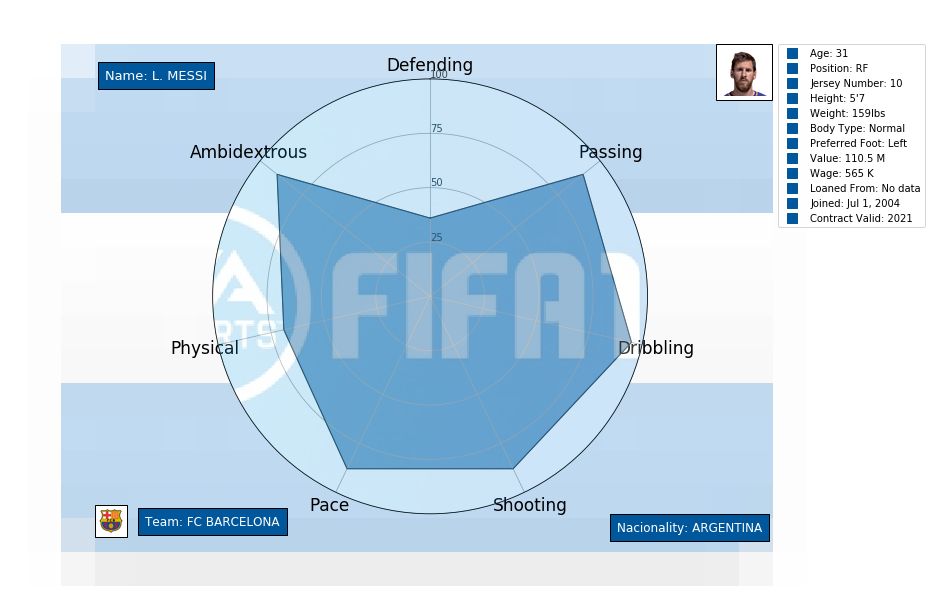

In [28]:
### When we call the function without id by default, the 0 is sent, which in this case is Messi
#### No Id
graphPolar()

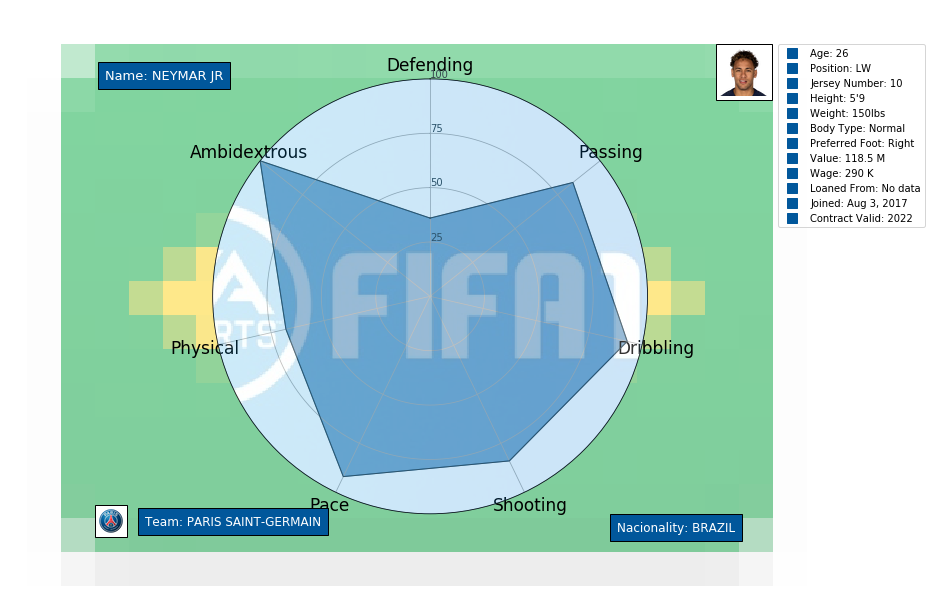

In [29]:
#### When we look for the id of a player or a GK the statistics with which the graph will be 
#### created are different

#### No GK
graphPolar(2)

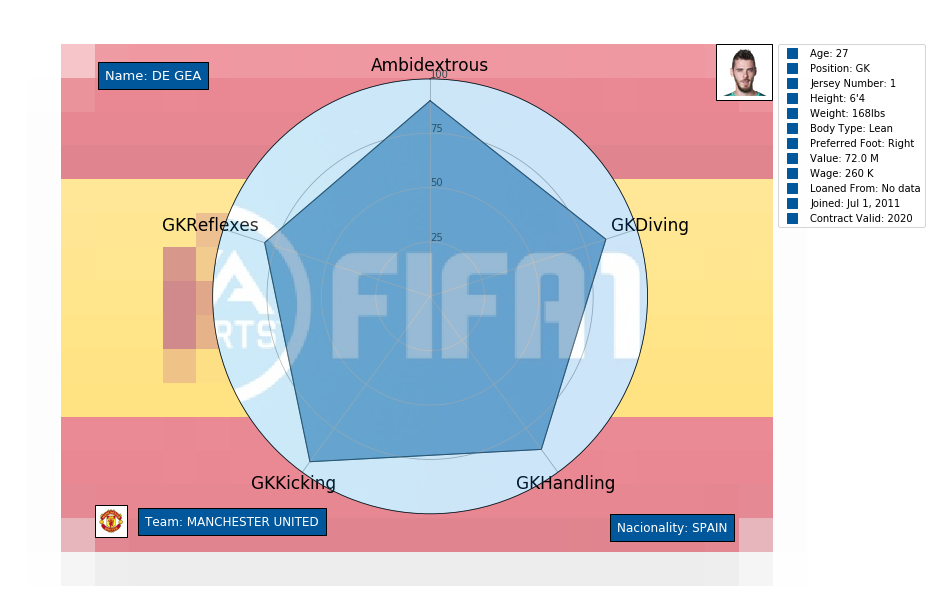

In [30]:
#### GK
graphPolar(3)

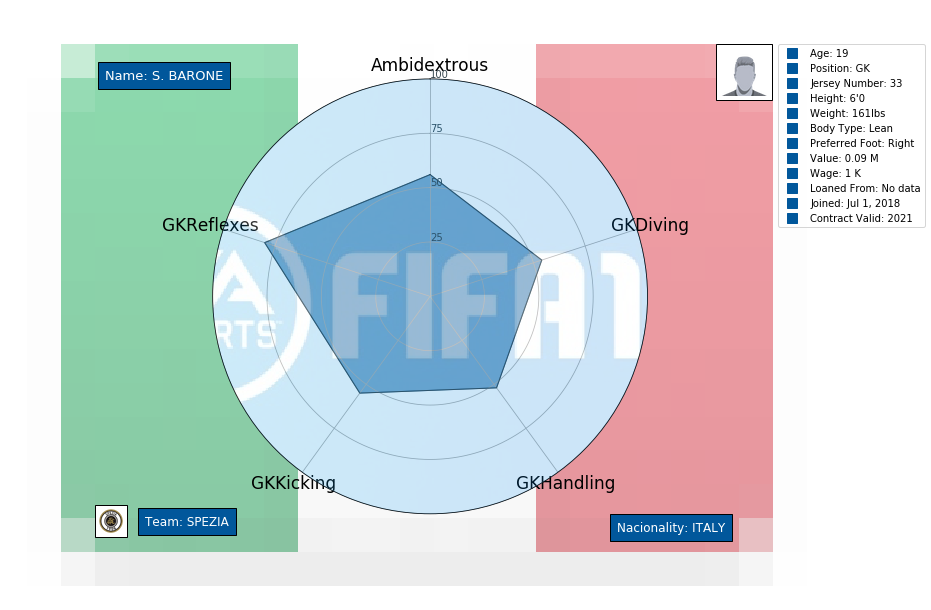

In [31]:
#### When the player does not have a photograph, the silhouette is assigned by default as 
#### explained previously.

# Player without photography
graphPolar(17035)

In [32]:
#### We continue, we will obtain the Potential of a player based on the position in which 
#### it is played

potential_filter = data.groupby('Position')['Potential'].max()
print('Total of positions: ' + str(len(potential_filter)))
potential_filter

Total of positions: 27


Position
CAM    91
CB     92
CDM    90
CF     88
CM     90
GK     93
LAM    89
LB     88
LCB    92
LCM    90
LDM    90
LF     94
LM     90
LS     89
LW     93
LWB    83
RAM    86
RB     88
RCB    91
RCM    92
RDM    91
RF     94
RM     95
RS     91
RW     92
RWB    86
ST     94
Name: Potential, dtype: int64

In [33]:
#### I will not need the URLs of the photos and other data so I build another smaller dataframe

columns = ['ID','Name','Club','Value', 'Wage','Position', 'Potential', 'Defending','Passing', 
           'Dribbling', 'Shooting','Pace','Physical','Ambidextrous', 'GKDiving', 'GKHandling',
           'GKKicking', 'GKReflexes']

dream_team = pd.DataFrame(columns = columns)


for x in range(0, len(potential_filter)):
    
    data_filter = data[(data['Potential'] == potential_filter.values[x]) 
                & (data['Position'] == potential_filter.index[x])].drop_duplicates('Position')
    
    dream_team = dream_team.append(data_filter, ignore_index=True, sort=False)

dream_team.rename(columns={'Position':'Posit', 'Potential' : 'Pot', 'Defending' : 'Def','Passing' : 'Pass', 
                           'Dribbling' : 'Drib', 'Shooting' : 'Shoot','Pace' : 'pace','Physical' : 'Phys',
                           'Ambidextrous' : 'Amb','GKDiving' : 'GKDiv','GKHandling' : 'GKHand',
                           'GKKicking' : 'GKKick','GKReflexes' : 'GKRefl'}, inplace=True)
    
dream_team.style.set_table_styles(
     [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
)

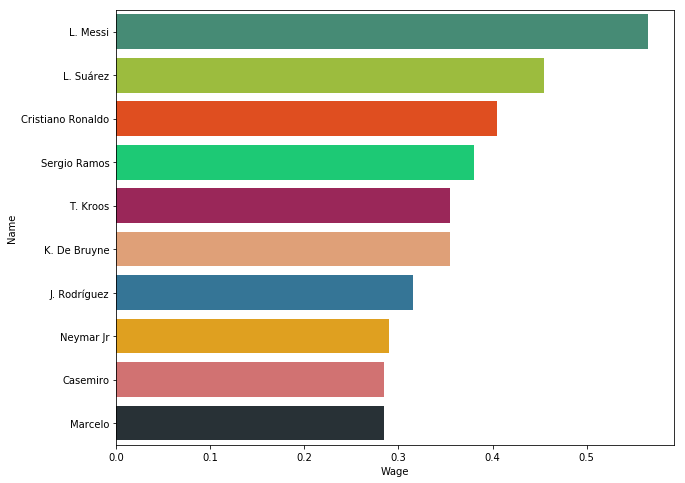

In [34]:
player_wage = dream_team[['Name', 'Wage']]
player_wage = player_wage.sort_values(by=['Wage'], ascending = False).head(10)
plt.subplots(figsize=(10, 8))
sns.barplot(x="Wage", y="Name", data=player_wage,
            label="Total", palette= palette)

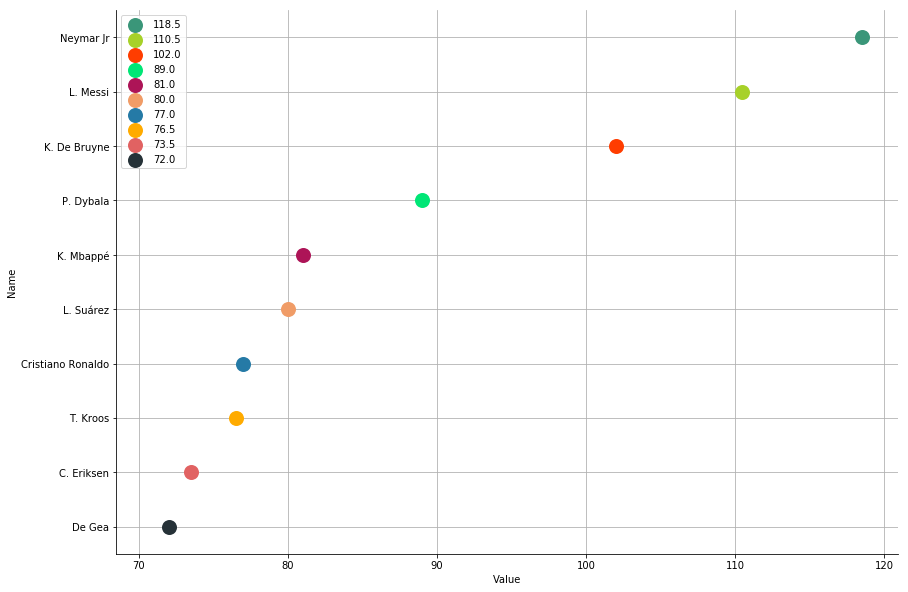

In [35]:
dream_team_player_value = dream_team.sort_values(by=['Value'], ascending = False).head(10)

g = sns.swarmplot(y = "Name",
              x = 'Value', 
              data = dream_team_player_value,
              size = 15,
              palette = palette)
g.figure.set_size_inches(14,10)
sns.despine()
plt.legend(dream_team_player_value.Value)
plt.grid()

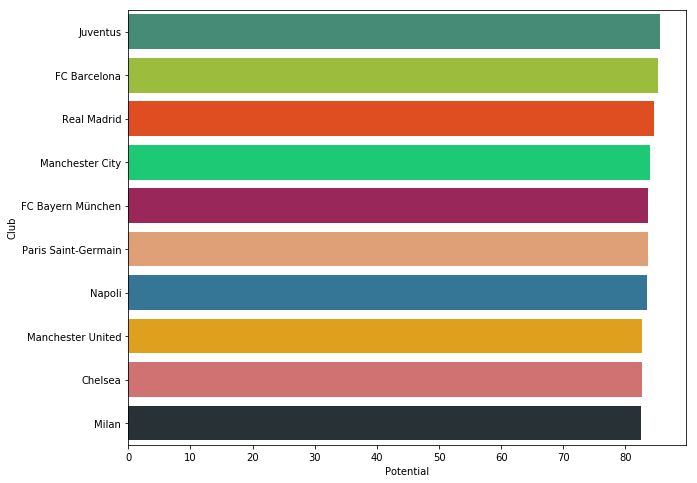

In [36]:
potential_for_club = players[['Club', 'Potential', 'Name']]
potential_for_club = potential_for_club.groupby(['Club']).mean()
potential_for_club = potential_for_club.sort_values(by=['Potential'], ascending = False).head(10)
potential_for_club = potential_for_club.reset_index()
plt.subplots(figsize=(10, 8))
sns.barplot(x="Potential", y="Club", data=potential_for_club,
            label="Total", palette= palette)

In [37]:
potential_for_club

Club  Potential
0             Juventus  85.520000
1         FC Barcelona  85.303030
2          Real Madrid  84.636364
3      Manchester City  83.909091
4    FC Bayern München  83.655172
5  Paris Saint-Germain  83.566667
6               Napoli  83.440000
7    Manchester United  82.666667
8              Chelsea  82.636364
9                Milan  82.555556

In [38]:
lista = sorted(potential_for_club.Club.tolist())

In [39]:
club_wage = data[data.Club.isin(lista)]

In [40]:
equip = club_wage.sort_values(by=['Club'])
equip = equip.reset_index(drop=True)

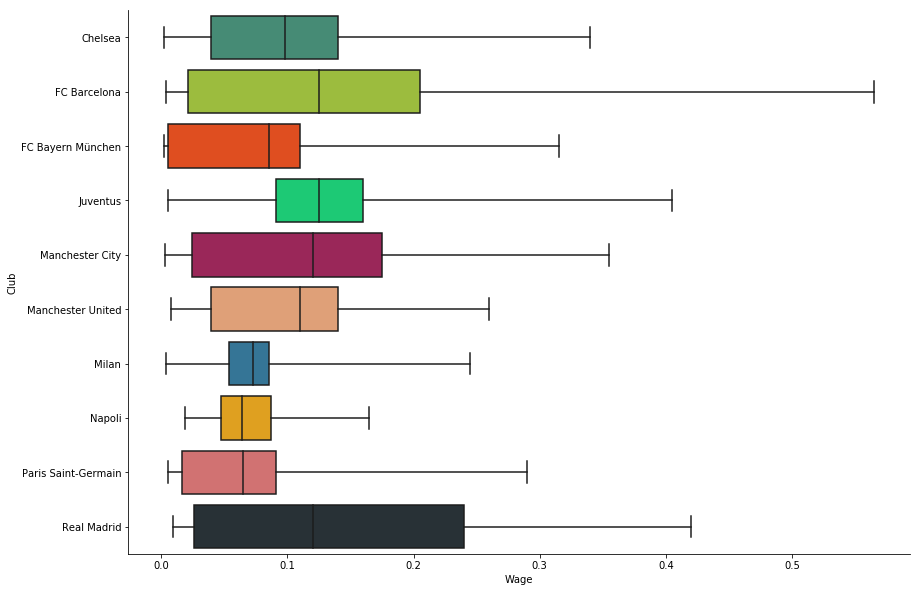

In [41]:
g = sns.boxplot(y = "Club",
                x = 'Wage',
                whis=np.inf,
                data = equip,
                palette = palette)
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

In [42]:
columnsDos = ['ID','Name','Club','Value', 'Wage','Position', 'Potential', 'Defending','Passing', 
           'Dribbling', 'Shooting','Pace','Physical','Ambidextrous', 'GKDiving', 'GKHandling',
           'GKKicking', 'GKReflexes']

maxWage = equip.groupby('Club')['Wage'].max()
resume = pd.DataFrame(columns = columns)

In [43]:
for x in range ( 0, len(maxWage)):
    data = equip[(equip.Club == maxWage.index[x]) & (equip.Wage == maxWage.values[x])]
    resume = resume.append(data, ignore_index=True, sort=False)

In [44]:
resume = resume[['Name','Wage', 'Club']]
resume = resume.reset_index()
resume

index               Name   Wage                 Club
0      0          E. Hazard  0.340              Chelsea
1      1           L. Messi  0.565         FC Barcelona
2      2       J. Rodríguez  0.315    FC Bayern München
3      3  Cristiano Ronaldo  0.405             Juventus
4      4       K. De Bruyne  0.355      Manchester City
5      5             De Gea  0.260    Manchester United
6      6         G. Higuaín  0.245                Milan
7      7         L. Insigne  0.165               Napoli
8      8          Neymar Jr  0.290  Paris Saint-Germain
9      9          L. Modrić  0.420          Real Madrid

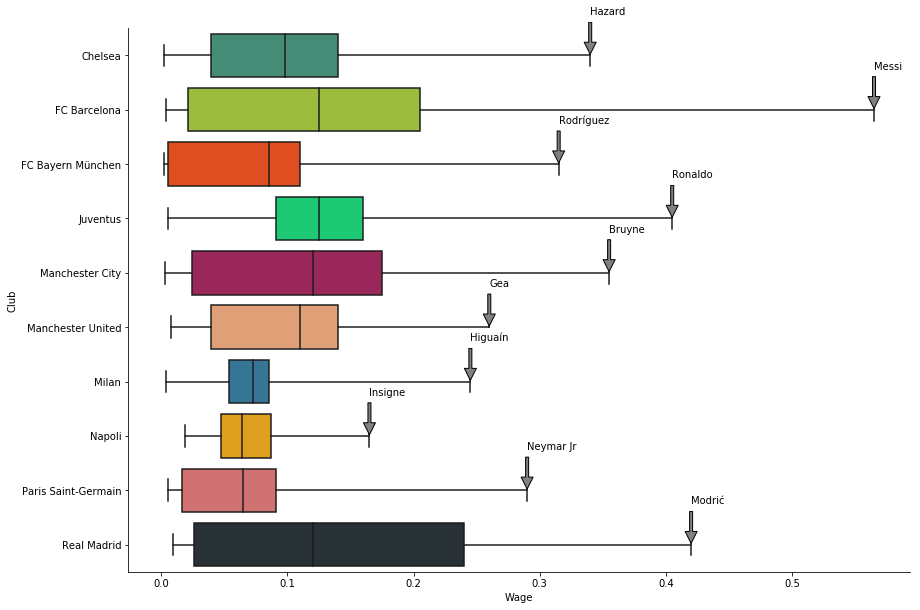

In [45]:
xyte = []

for x in range(0, len(resume)):
    xyte.append(((resume.Wage[x]), x - 0.75))

for x in range(0, len(resume)):
    
    if resume.Name[x] != 'Neymar Jr':
        words = resume.Name[x].split()
        name = words[-1]
    else:
        name = resume.Name[x]
        
    plt.annotate(s = name,
                 xy = (resume.Wage[x],x),
                 xytext = (xyte[x]), 
                 arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
                 backgroundcolor = 'white')

g = sns.boxplot(y = "Club",
                x = "Wage", 
                data = equip,
                whis=np.inf,
                palette= palette)

sns.despine()
g.figure.set_size_inches(14,10)
plt.show()   

In [46]:
nacionalities = players.Nationality[players.Club.isin(potential_for_club.Club)]
nac_potential_club = pd.DataFrame({'id':nacionalities.index, 'nacionality':nacionalities.values})
nac_potential_club = nac_potential_club.groupby(['nacionality']).count().sort_values(by=['id'], ascending = False).head(10)
nac_potential_club = nac_potential_club.reset_index()
nac_potential_club

nacionality  id
0       Spain  58
1      France  35
2       Italy  34
3     England  29
4     Germany  28
5      Brazil  24
6   Argentina  13
7     Belgium   9
8    Portugal   7
9     Croatia   7

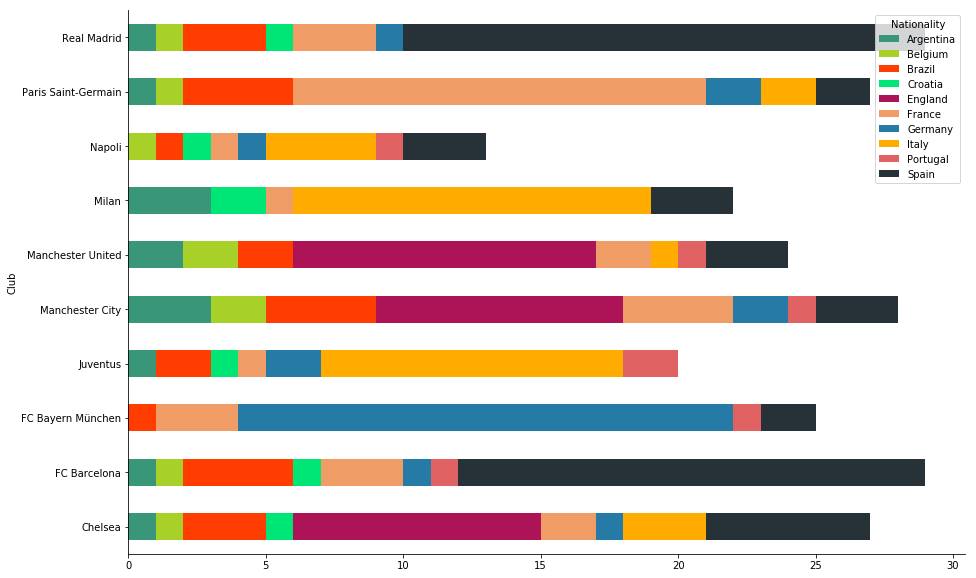

In [47]:
nac_for_equip = players[(players['Club'].isin(potential_for_club.Club.tolist())) & 
                      (players['Nationality'].isin(nac_potential_club.nacionality)) 
                     ]
df_plot = nac_for_equip.groupby(['Club', 'Nationality']).size().reset_index().pivot(columns='Club', 
                                                                                         index='Nationality', 
                                                                                         values=0).reset_index()
g = df_plot.set_index('Nationality').T.plot(kind='barh', stacked=True, color=palette)
sns.despine()
g.figure.set_size_inches(15,10)
    
plt.show()